# Regularization Techniques

This is form of regression, that constrain/regularize or shrinks the coefficient estimates towards zero.

This technique discourages learning a more complex or flexible model, so as to avoid the risk of outfitting.

# Regularization can achieve this motive with 2 techniques 

1 . Ridge Regularization/L2

2 . Lasso Regularization/L1

# Lasso Regularization / L1

This is Regularization technique used in feature selection using a shrinkage method also referred to as the penalized regression method.

# Ridge Regularization / L2

Ridge regression also know as L2 regularization, is and extension to linear regression that introduces a regularization term to reduce 
model complexity and help prevent overfitting.

Ridge regression is working value/magnitude of coefficient is also equal zero.

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv("house_price_dataset.csv")
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,4,2.0,3268,6724,2.0,0,1,3,2817,451,2021,0,1507856.370
1,5,3.0,4453,12083,1.5,0,3,3,4248,205,2010,0,1138642.895
2,3,2.2,3686,14149,1.5,0,4,3,3097,589,2013,0,1435506.186


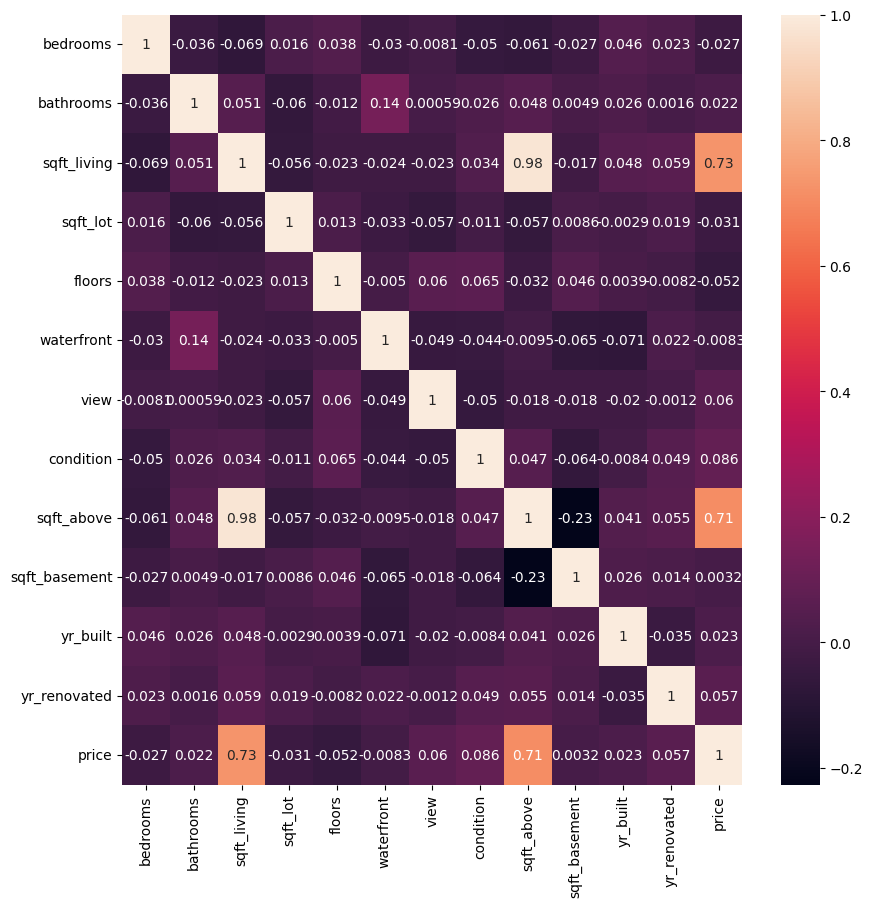

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [8]:
x = dataset.iloc[:,:-1]
y = dataset["price"]

In [10]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression , Lasso, Ridge

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
lr.score(x_test,y_test)*100

51.71884804810733

In [18]:
lr.coef_

array([ 21193.07486364, -16231.94355259, 202902.17733276,  19823.53694347,
       -19807.21206851,  11723.4814156 ,  46085.10428986,  50084.48282076,
       185638.21226673,  57198.85764896,  -1658.37503165,   3969.4929256 ])

In [19]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [37]:
print(mean_squared_error(y_test,lr.predict(x_test))) # cost function 
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))) # Root mean_squared_error

149031646148.35678
302336.0668722871
386046.17100595206


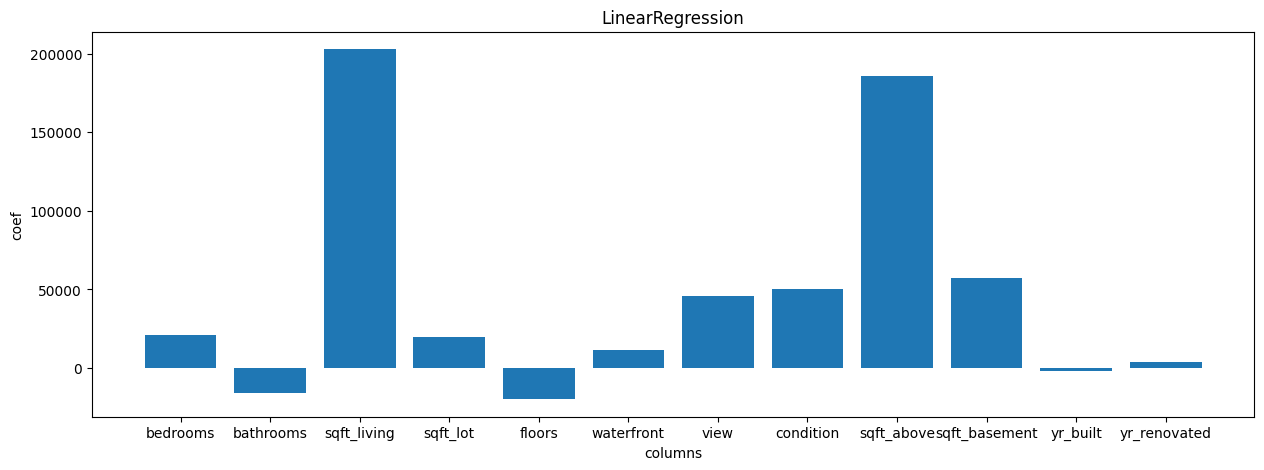

In [22]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Lasso 

In [29]:
la = Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

C:\Users\Ramay Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.396e+11, tolerance: 1.176e+10
  model = cd_fast.enet_coordinate_descent(


51.71884921569996

In [38]:
print(mean_squared_error(y_test,la.predict(x_test))) # cost function 
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test)))) # Root mean_squared_error

149031642544.2951
302336.0654143951
386046.1663380367


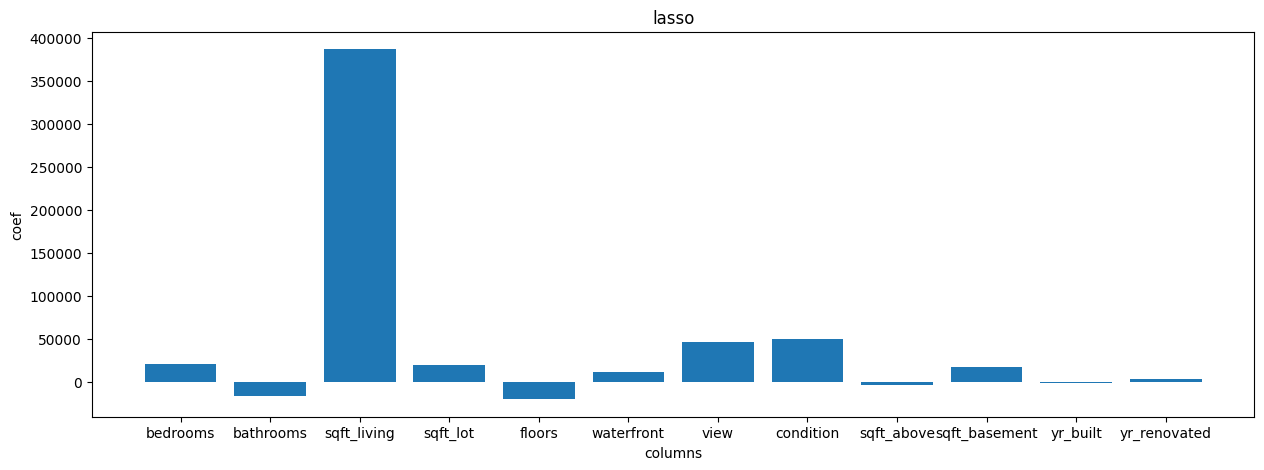

In [30]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Ridge

In [31]:
ri = Ridge(alpha=5)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

51.75823178823599

In [39]:
print(mean_squared_error(y_test,ri.predict(x_test))) # cost function 
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test)))) # Root mean_squared_error

148910078551.36368
302357.91225842695
385888.68673668534


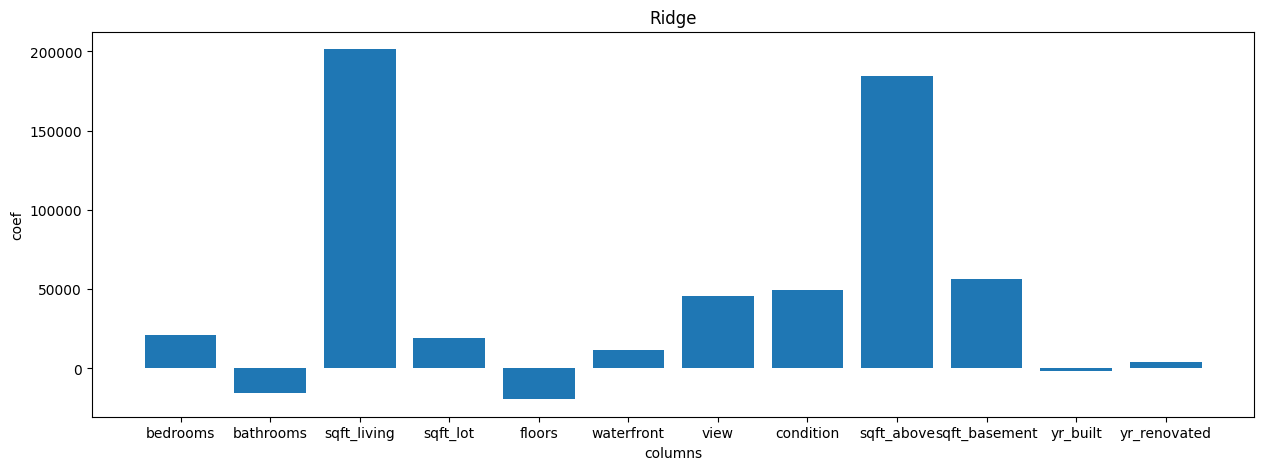

In [32]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [40]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,21193.074864,21193.064519,20710.580428
1,bathrooms,-16231.943553,-16231.932087,-15856.285257
2,sqft_living,202902.177333,387216.174704,201523.778700
3,sqft_lot,19823.536943,19823.525628,19401.952086
4,floors,-19807.212069,-19807.199828,-19434.986743
5,waterfront,11723.481416,11723.467640,11356.879365
6,view,46085.104290,46085.091584,45422.722179
7,condition,50084.482821,50084.469255,49428.641381
8,sqft_above,185638.212267,-3569.998339,184520.813101
9,sqft_basement,57198.857649,17452.659966,56126.124296
